# CSTAT Lab #7
This is the seventh lab of the computational statistics course, covering time series, the AR(1) and MA(1) model and the ACF and PACF functions.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline
np.random.seed(42)

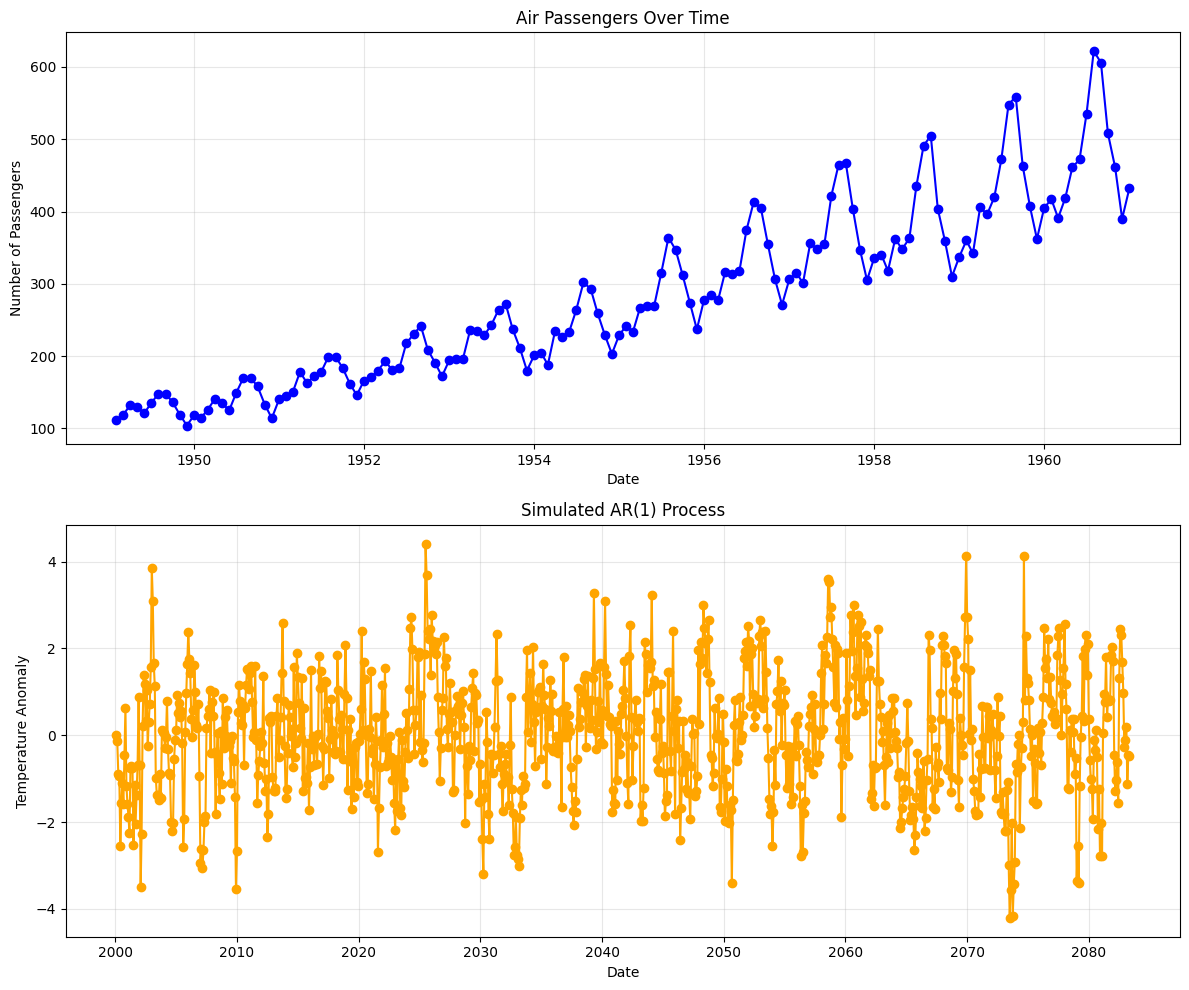

In [ ]:
air_data = sm.datasets.get_rdataset("AirPassengers", "datasets", cache=True).data
df_air = air_data.copy()
# This is a simplistic conversion from decimal year to a monthly date range
start_year = int(df_air['time'].iloc[0])
n_points = len(df_air)
df_air.index = pd.date_range(start=f"{start_year}-01", periods=n_points, freq="ME")
df_air.drop(columns='time', inplace=True, errors='ignore')
df_air.columns = ['AirPassengers']
df_air.index.name = 'Date'

# Simulate AR(1)
phi = 0.7
n = 1000
sigma = 1.0
eps = np.random.normal(0, sigma, n)

x = np.zeros(n)
for t in range(1, n):
    x[t] = phi * x[t - 1] + eps[t]
df_sim = pd.DataFrame(x, columns=['SimulatedAR1'])
df_sim.index = pd.date_range(start="2000-01", periods=n, freq="ME")
df_sim.index.name = 'Date'

# Create a figure with subplots for sunspot and air passenger data
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Plot Air passengers time series
axes[0].plot(df_air.index, df_air['AirPassengers'], marker='o', linestyle='-', color='blue')
axes[0].set_title("Air Passengers Over Time")
axes[0].set_ylabel("Number of Passengers")
axes[0].set_xlabel("Date")
axes[0].grid(True, alpha=0.3)

# Plot Sunspot activity
axes[1].plot(df_sim.index, df_sim['SimulatedAR1'], marker='o', linestyle='-', color='orange')
axes[1].set_title("Simulated AR(1) Process")
axes[1].set_ylabel("Simulated Value")
axes[1].set_xlabel("Date")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Our first dataset is the air passengers dataset, covering a period in the 20th century with total monthly air passengers as points.
Next, we simulate a AR(1) process with zero-mean and $\phi_1 = 0.7, \sigma_w^2 = 1$ by repeatedly drawing $w_t \sim N(0,\sigma_w^2)$, giving us the second graph.

# Time Series properties
## Analyzing the graph 
Start by analyzing the air passengers time series, starting by testing your intuition using the above graph. 

1. Consider if both time series have a trend, seasonality and/or constant variance.  
2. Is the time series weakly stationary? (same mean and variance for all time steps and covariance between $x_t$ and $x_{t-h}$ is the same for all lags h)

## Quantitative analysis 
Let us analyze some properties of the air passengers data. 
For both datasets, start by plotting $x_t$ with its lagged version $x_{t-1}$ and see if we recognize a possible AR relationship.

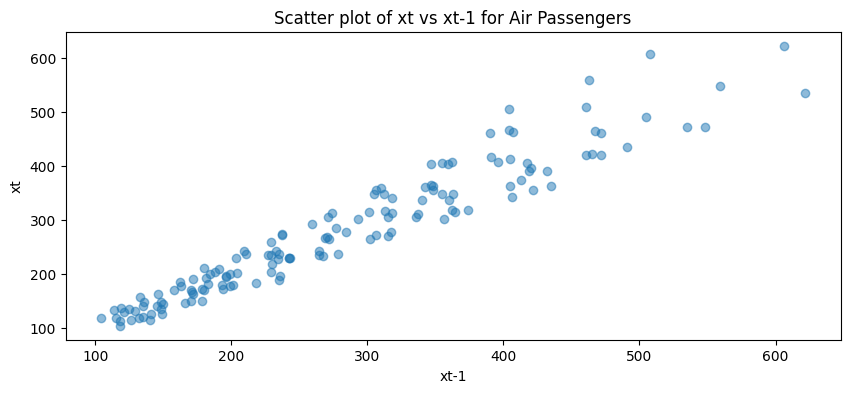

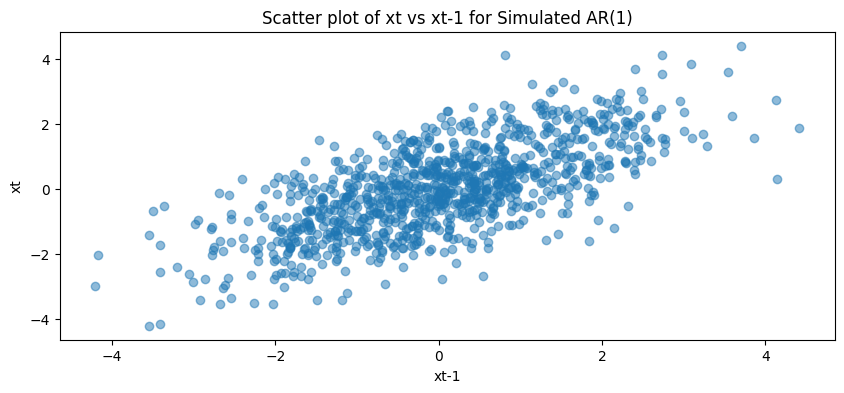

In [28]:

# Plot xt vs xt-1 for AirPassengers
air_passengers_values = df_air['AirPassengers']
plt.figure(figsize=(10, 4))

air_passengers_xt_minus_1 = ...
air_passengers_xt = ...

plt.scatter(air_passengers_xt, air_passengers_xt_minus_1, alpha=0.5)
plt.title("Scatter plot of xt vs xt-1 for Air Passengers")
plt.ylabel("xt")
plt.xlabel("xt-1")
plt.show()

# Plot xt vs xt-1 for Simulated AR(1)
ar1_values = df_sim['SimulatedAR1']
plt.figure(figsize=(10, 4))

simulated_ar1_xt_minus_1 = ...
simulated_ar1_xt = ...

plt.scatter(simulated_ar1_xt, simulated_ar1_xt_minus_1, alpha=0.5)
plt.title("Scatter plot of xt vs xt-1 for Simulated AR(1)")
plt.ylabel("xt")
plt.xlabel("xt-1")
plt.show()


In the above graphs, since the AR(1) model is written as $x_t = \delta + \phi_1 x_{t-1} + w_t$ a linear trend can indicate that an AR(1) process is a good first choice.  We would expect the residuals to be normally distributed with zero mean. Calculate the residuals after regressing the $x_t$ on $x_{t-1}$.

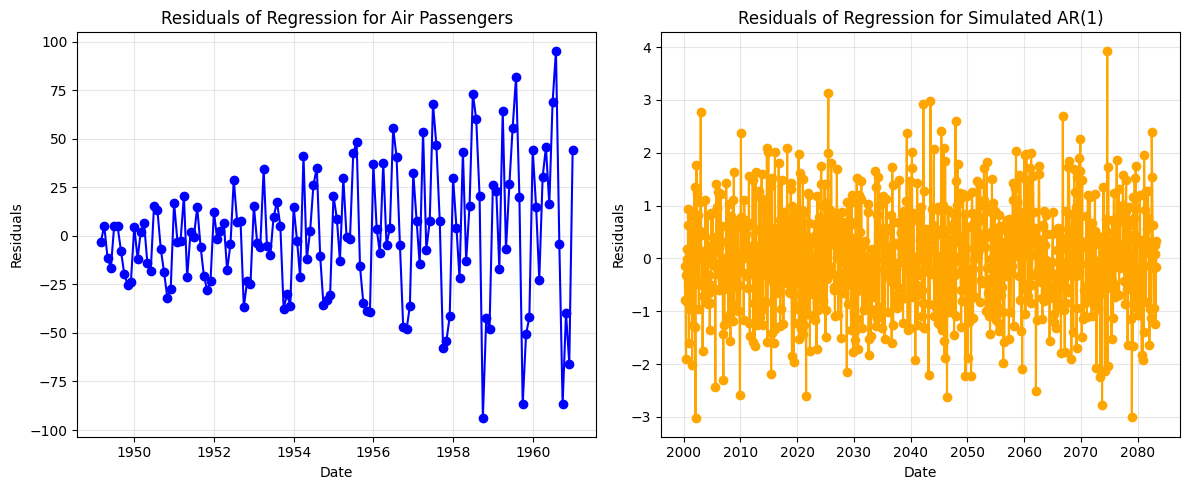

In [18]:
regression_residuals_air = ...
regression_residuals_sim = ...

# Plotting the residuals of the regression for Air Passengers
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(df_air.index[1:], regression_residuals_air, marker='o', linestyle='-', color='blue')
plt.title("Residuals of Regression for Air Passengers")
plt.ylabel("Residuals")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)

# Plotting the residuals of the regression for Simulated AR(1)
plt.subplot(1, 2, 2)
plt.plot(df_sim.index[1:], regression_residuals_sim, marker='o', linestyle='-', color='orange')
plt.title("Residuals of Regression for Simulated AR(1)")
plt.ylabel("Residuals")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

    

Practitioners often analyze time series by "differencing" i.e. computing $x_t - x_{t-1}$ and inspecting its properties. A simple function for this is np.diff(...).

## Autocorrelation
Now we move on to the analysis and calculation of the sample autocorrelations for each dataset. 
Fill in the blanks in the manual acf function below.

ACF values for simulated AR(1): [1.0, 0.687355496264737, 0.47206956658552507, 0.33219530923073565, 0.24743749905293677, 0.1983511082692737, 0.15162534312249307, 0.1116361662222769, 0.07466887884983894, 0.056094232399372, 0.04486475178421385, 0.04177040675771576, 0.017523374738598486, 0.03276458091382582, 0.05774144969240007, 0.04654467226764066, 0.039460698248442214, 0.0011498879901134789, -0.013990668701666162, -0.025385852427655127, -0.005064663444746529]


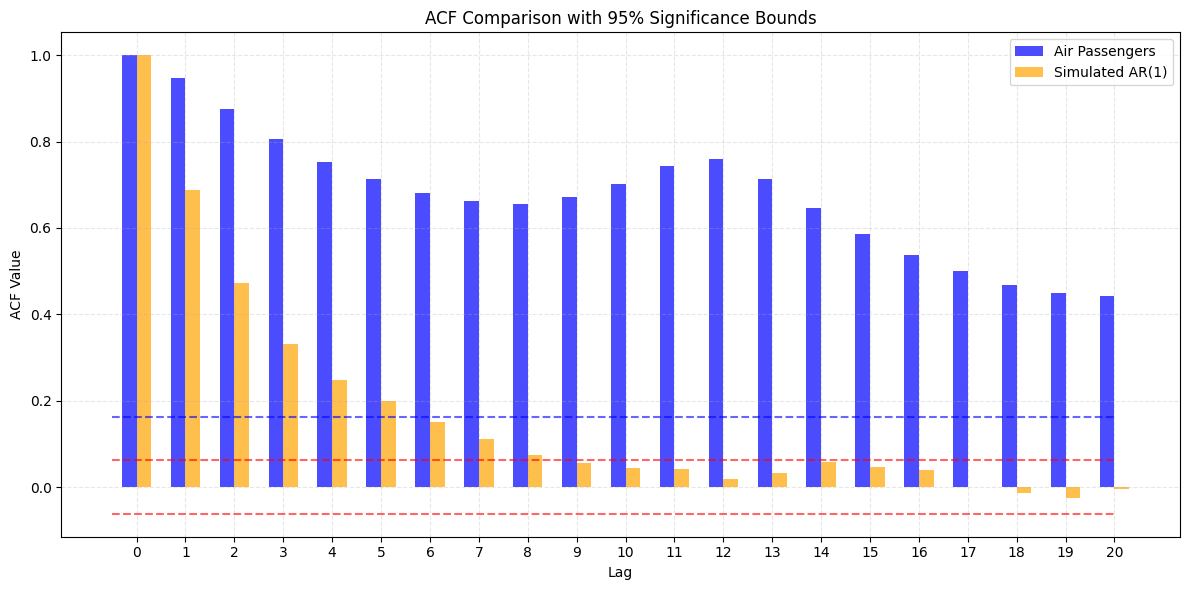

In [19]:

def manual_acf(series, max_lag):
    x = series.values
    n = len(x)
    mean_x = ...
    denominator = ...
    
    acf_vals = []
    for lag in range(max_lag + 1):
        future_values = x[lag:]
        past_values = x[:n - lag]
        numerator = ...
        acf_vals.append(float(numerator / denominator))
    return acf_vals

# Calculate ACF values
acf_vals_air = manual_acf(df_air['AirPassengers'], max_lag=20)
acf_vals_ar1 = manual_acf(df_sim['SimulatedAR1'], max_lag=20)

print(f"ACF values for simulated AR(1): {acf_vals_ar1}")

# 95% confidence bounds (assuming white noise)
n_air = len(df_air)
n_sim = len(df_sim)
conf_air = 1.96 / np.sqrt(n_air)
conf_sim = 1.96 / np.sqrt(n_sim)

# Plot
plt.figure(figsize=(12, 6))

lags = np.arange(len(acf_vals_air))

# Air Passengers
plt.bar(lags - 0.15, acf_vals_air, width=0.3, alpha=0.7, color='blue', label='Air Passengers')
plt.hlines([conf_air], xmin=-0.5, xmax=max(lags), colors='blue', linestyles='--', alpha=0.6)

# Sunspots
plt.bar(lags + 0.15, acf_vals_ar1, width=0.3, alpha=0.7, color='orange', label='Simulated AR(1)')
plt.hlines([conf_sim, -conf_sim], xmin=-0.5, xmax=max(lags), colors='red', linestyles='--', alpha=0.6)
plt.title("ACF Comparison with 95% Significance Bounds")
plt.xlabel("Lag")
plt.ylabel("ACF Value")
plt.xticks(lags)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()




For AR(1) models, the ACF shows a tapering pattern defined by $\phi_1^h$. See if you can estimate $\phi_1$ from the AR(1) ACF values using a calculator. Notice that the air passengers dataset carries a complex autocorrelation pattern. Describe why the autocorrelation spikes around 12 months. 

## AR(1) model
The AR(1) model is defined by the relation $x_t = \phi_1 x_{t-1} + w_t$. 
Let us see how our data fits this model by manually fitting the AR(1) model using the MLE estimator (least squares): 


We consider the AR(1) model:

$x_t = \phi_1 x_{t-1} + w_t, \quad w_t \sim \mathcal{N}(0, \sigma^2), \quad t = 2, \dots, n$


The conditional likelihood of $x_t$ is
:

$L(\phi_1, \sigma^2) = \prod_{t=2}^n \frac{1}{\sqrt{2\pi \sigma^2}} \exp\left( -\frac{(x_t - \phi_1 x_{t-1})^2}{2\sigma^2} \right)$

The log-likelihood function is:
$\log L(\phi_1, \sigma^2) = -\frac{n-1}{2} \log(2\pi \sigma^2) - \frac{1}{2\sigma^2} \sum_{t=2}^n (x_t - \phi_1 x_{t-1})^2$

To find the MLE of $ \phi_1 $, we can fix $ \sigma^2 $ and maximize the log-likelihood with respect to $ \phi_1 $. This is equivalent to minimizing the sum of squared residuals:
$\min_{\phi_1} \sum_{t=2}^n (x_t - \phi_1 x_{t-1})^2$


Solving gives:

$\sum_{t=2}^n x_t x_{t-1} - \phi_1 \sum_{t=2}^n x_{t-1}^2 = 0$


$ \Rightarrow \hat{\phi_1}_{\text{MLE}} = \frac{\sum_{t=2}^n x_t x_{t-1}}{\sum_{t=2}^n x_{t-1}^2} $



With this estimate, we can inspect if the correlation between observations h time steps apart adheres to the function $\phi_1^h$. Fill in the blanks below to get the least-squares estimate of $\phi_1$

Estimated phi for Air Passengers: 1.0004
Estimated phi for Simulated AR(1): 0.6875


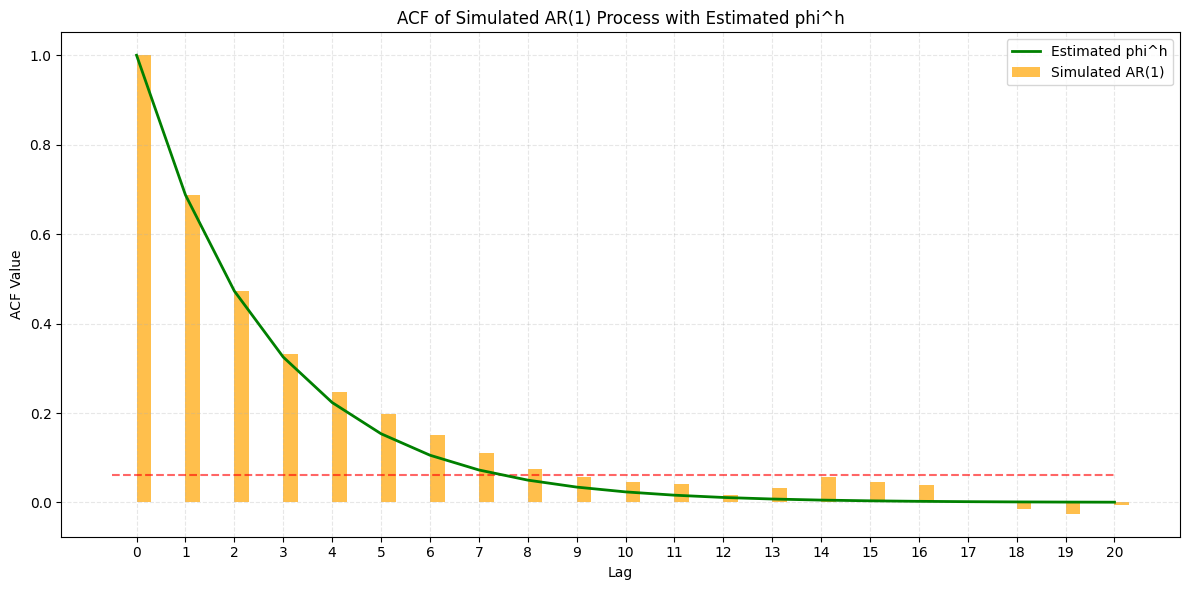

In [20]:
def lse_phi(series):
    x = series.values

    current_values = ...
    lagged_values = ...

    numerator = ...
    denominator = ...

    phi_hat = numerator / denominator
    return phi_hat

# Estimate phi for Air Passengers
phi_hat_air = lse_phi(df_air['AirPassengers'])
print(f"Estimated phi for Air Passengers: {phi_hat_air:.4f}")

# Estimate phi for Simulated AR(1)
phi_hat_ar1 = lse_phi(df_sim['SimulatedAR1'])
print(f"Estimated phi for Simulated AR(1): {phi_hat_ar1:.4f}")

## plot phi^h for simulated AR(1) process over the original acf

plt.figure(figsize=(12, 6))
lags = np.arange(len(acf_vals_ar1))
plt.bar(lags + 0.15, acf_vals_ar1, width=0.3, alpha=0.7, color='orange', label='Simulated AR(1)')
plt.hlines([conf_sim], xmin=-0.5, xmax=max(lags), colors='red', linestyles='--', alpha=0.6)
plt.plot(lags, [phi_hat_ar1**lag for lag in lags], color='green', label='Estimated phi^h', linewidth=2)

plt.title("ACF of Simulated AR(1) Process with Estimated phi^h")
plt.xlabel("Lag")
plt.ylabel("ACF Value")
plt.xticks(lags)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


Notice how the estimate fits the ACF quite well.
Our estimated $\phi_1$ for the Air Passengers is > 1, which is concerning! 
The relation $\phi_1^h$ means that our ACF would be increasing, perhaps a better model is needed. 
We will come back to this dataset in a future lab.

## MA(1) model

We simulate an MA(1) model: $x_t = \mu + w_t + \theta_1 w_{t-1}$ with $\mu = 0, \theta_1 = 0.5, \sigma^2_w = 1$

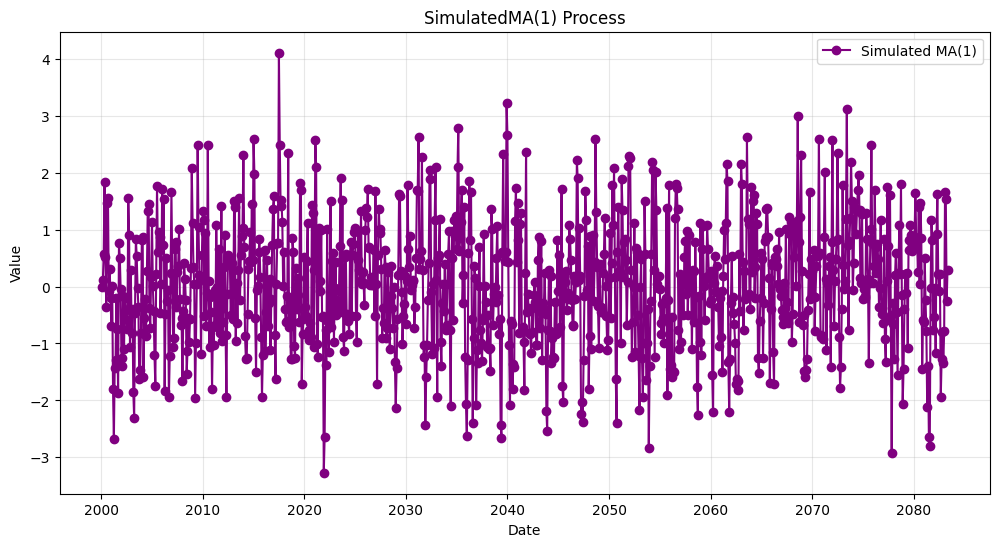

In [ ]:
def simulate_ma1(theta, n, sigma):
    eps = np.random.normal(0, sigma, n)
    x = np.zeros(n)
    for t in range(1, n):
        x[t] = eps[t] + theta * eps[t - 1]
    return x


# Simulate MA(1) process
theta = 0.5
ma1_data = simulate_ma1(theta, n, sigma)
df_ma1 = pd.DataFrame(ma1_data, columns=['SimulatedMA1'])
df_ma1.index = pd.date_range(start="2000-01", periods=n, freq="ME")
df_ma1.index.name = 'Date'

# Plot the MA(1) process
plt.figure(figsize=(12, 6))
plt.plot(df_ma1.index, df_ma1['SimulatedMA1'], marker='o', linestyle='-', color='purple', label='Simulated MA(1)')
plt.title("SimulatedMA(1) Process")
plt.ylabel("Value")
plt.xlabel("Date")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


Theoretically, the only nonzero value of the ACF for an MA(1) process is the first lag. Verify this in the code block below.

In [ ]:
ma1_acf_vals = ...
print(f"First 5 ACF values for Simulated MA(1): {ma1_acf_vals[:5]}")
conf_ma1 = ...
print(f"95% confidence interval for MA(1): {conf_ma1:.4f}")


First 5 ACF values for Simulated MA(1): [1.0, 0.38414167580795894, -0.0035661258660595325, 0.02105560213930182, -0.013405452925730438]
95% confidence interval for MA(1): 0.0620


Moving on to the PACF function, we use plot_pacf from statsmodels to visualize our pacf values.
We will not calculate this manually, since it is quite involved. Statsmodels uses the "Yule-Walker" equations to estimate the PACF values. 
Add the code to plot the pacf for or simulated datasets.

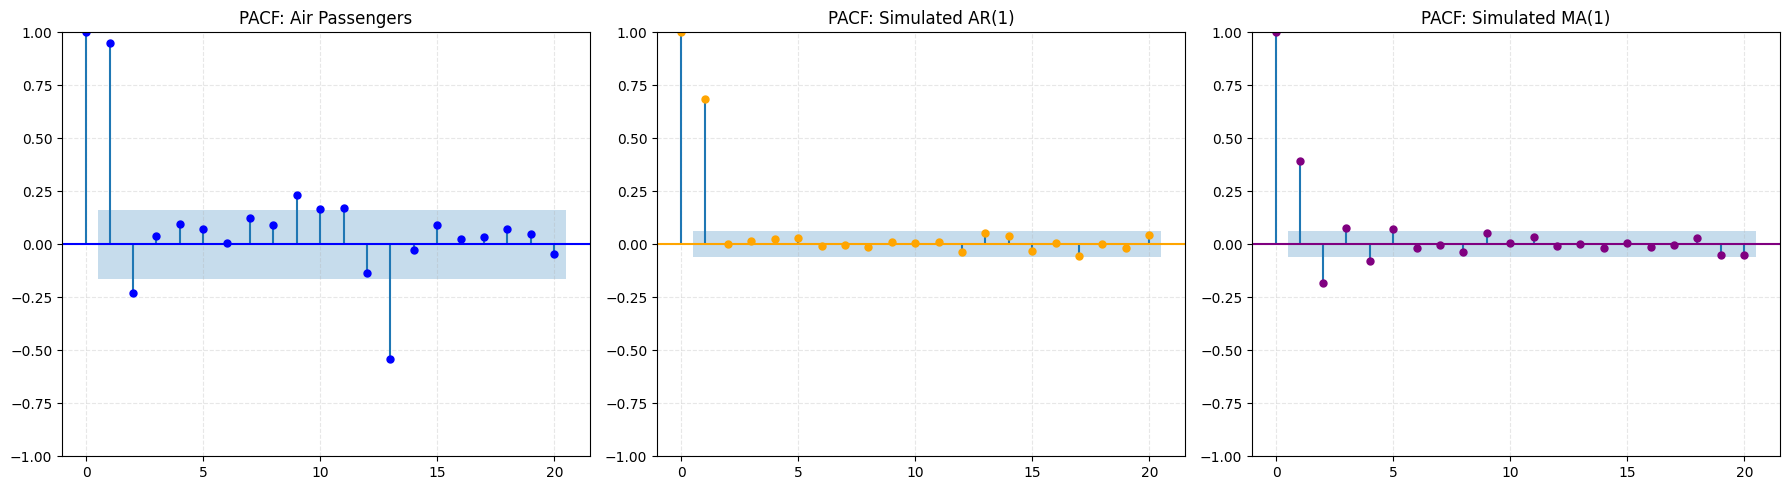

In [27]:
# Plot ACF comparison with three subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot PACF for Air Passengers
plot_pacf(df_air['AirPassengers'], lags=20, alpha=0.05, ax=axes[0], color='blue')
axes[0].set_title('PACF: Air Passengers', fontsize=12)
axes[0].grid(True, alpha=0.3, linestyle='--')

# Plot PACF for AR(1) simulation
...
...
...

# Plot PACF for MA(1) simulation
...
...
...

plt.tight_layout()
plt.show()

## PACF analysis
1. Characterize how we recognize the simulated AR and MA nature of our simulated processes. 
2. Hypothesize what kind of model would fit the Air Passengers data.